<a href="https://colab.research.google.com/github/fightmeat/Machine_Leaning/blob/main/18_%EB%8C%80%ED%95%9C%EB%AF%BC%EA%B5%AD_%EC%9C%A0%EB%A0%B9_%EB%8F%84%EC%8B%9C_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

# 주제 선정 이유
- 유령 도시 : 한국의 고령화사회
- 가구수가 없는 지역
- 65세 이상 노인인구의 비중이 중장년층(20 ~ 39)의 비중보다 큰 경우
- 소멸 위험 지역

## 인구 데이터 확보
- 우리나라 인구수(행정구역별 - 광역시도, 행정구역별 - 시도)
- 국가통계포털(KOSIS)에서 인구 현황 데이터를 다운 받아 사용 : https://kosis.kr/index/index.do
- 성별, 연령 및 세대 구성별 인구 - 시군구를 선택하고, 다시 각 지역별 항목과 필요한 연령대별 항목을 선택해서 데이터를 다운
- 데이터셋 : population_raw_data.xlsx
- 한국고용정보원 논문도 참고

In [1]:
import pandas as pd
import numpy as np

import platform
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.rc('font', family='NanumGothic')

In [3]:
pop = pd.read_excel('population_raw_data.xlsx', header = 1)
pop.head()

,행정구역(동읍면)별(1),행정구역(동읍면)별(2),항목,계,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+
0,전국,소계,총인구수 (명),51696216.0,3541061.0,3217367.0,3517868,4016272.0,2237345.0,1781229.0,1457890,909130.0,416164.0,141488.0,34844,17562.0
1,NaN,NaN,남자인구수 (명),25827594.0,1877127.0,1682988.0,1806754,2045265.0,1072395.0,806680.0,600607,319391.0,113221.0,32695.0,7658,4137.0
2,NaN,NaN,여자인구수 (명),25868622.0,1663934.0,1534379.0,1711114,1971007.0,1164950.0,974549.0,857283,589739.0,302943.0,108793.0,27186,13425.0
3,서울특별시,소계,총인구수 (명),9930616.0,690728.0,751973.0,803507,817467.0,448956.0,350580.0,251961,141649.0,66067.0,24153.0,7058,5475.0
4,NaN,NaN,남자인구수 (명),4876789.0,347534.0,372249.0,402358,410076.0,211568.0,163766.0,112076,54033.0,19595.0,6146.0,1900,1406.0


### 컬럼명 변경

In [4]:
# 결측치를 대체할 때 fillna(method)
# method = 'pad' 결측치를 앞에 있는 값으로 채워라
pop.fillna(method='pad', inplace=True)
pop.head()

,행정구역(동읍면)별(1),행정구역(동읍면)별(2),항목,계,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+
0,전국,소계,총인구수 (명),51696216.0,3541061.0,3217367.0,3517868,4016272.0,2237345.0,1781229.0,1457890,909130.0,416164.0,141488.0,34844,17562.0
1,전국,소계,남자인구수 (명),25827594.0,1877127.0,1682988.0,1806754,2045265.0,1072395.0,806680.0,600607,319391.0,113221.0,32695.0,7658,4137.0
2,전국,소계,여자인구수 (명),25868622.0,1663934.0,1534379.0,1711114,1971007.0,1164950.0,974549.0,857283,589739.0,302943.0,108793.0,27186,13425.0
3,서울특별시,소계,총인구수 (명),9930616.0,690728.0,751973.0,803507,817467.0,448956.0,350580.0,251961,141649.0,66067.0,24153.0,7058,5475.0
4,서울특별시,소계,남자인구수 (명),4876789.0,347534.0,372249.0,402358,410076.0,211568.0,163766.0,112076,54033.0,19595.0,6146.0,1900,1406.0


In [5]:
pop.rename(columns={'행정구역(동읍면)별(1)': '광역시도',
                    '행정구역(동읍면)별(2)': '시도',
                    '계':'인구수'}, inplace=True)
pop.head(10)

,광역시도,시도,항목,인구수,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+
0,전국,소계,총인구수 (명),51696216.0,3541061.0,3217367.0,3517868,4016272.0,2237345.0,1781229.0,1457890,909130.0,416164.0,141488.0,34844,17562.0
1,전국,소계,남자인구수 (명),25827594.0,1877127.0,1682988.0,1806754,2045265.0,1072395.0,806680.0,600607,319391.0,113221.0,32695.0,7658,4137.0
2,전국,소계,여자인구수 (명),25868622.0,1663934.0,1534379.0,1711114,1971007.0,1164950.0,974549.0,857283,589739.0,302943.0,108793.0,27186,13425.0
3,서울특별시,소계,총인구수 (명),9930616.0,690728.0,751973.0,803507,817467.0,448956.0,350580.0,251961,141649.0,66067.0,24153.0,7058,5475.0
4,서울특별시,소계,남자인구수 (명),4876789.0,347534.0,372249.0,402358,410076.0,211568.0,163766.0,112076,54033.0,19595.0,6146.0,1900,1406.0
5,서울특별시,소계,여자인구수 (명),5053827.0,343194.0,379724.0,401149,407391.0,237388.0,186814.0,139885,87616.0,46472.0,18007.0,5158,4069.0
6,서울특별시,종로구,총인구수 (명),152737.0,11379.0,11891.0,10684,10379.0,7411.0,6636.0,5263,3104.0,1480.0,602.0,234,220.0
7,서울특별시,종로구,남자인구수 (명),75201.0,5620.0,6181.0,5387,5034.0,3411.0,3009.0,2311,1289.0,506.0,207.0,89,73.0
8,서울특별시,종로구,여자인구수 (명),77536.0,5759.0,5710.0,5297,5345.0,4000.0,3627.0,2952,1815.0,974.0,395.0,145,147.0
9,서울특별시,중구,총인구수 (명),125249.0,8216.0,9529.0,10332,10107.0,6399.0,5313.0,4127,2502.0,1260.0,469.0,158,160.0


In [6]:
# '시도' 컬럼에 '소계'라고 써있는 부분을 제외하고 작업
pop = pop[pop['시도'] != '소계']

In [7]:
pop.rename(columns={'항목':'구분'},inplace=True)
pop.head()

<ipython-input-7-49bb7683b15c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop.rename(columns={'항목':'구분'},inplace=True)


,광역시도,시도,구분,인구수,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+
6,서울특별시,종로구,총인구수 (명),152737.0,11379.0,11891.0,10684,10379.0,7411.0,6636.0,5263,3104.0,1480.0,602.0,234,220.0
7,서울특별시,종로구,남자인구수 (명),75201.0,5620.0,6181.0,5387,5034.0,3411.0,3009.0,2311,1289.0,506.0,207.0,89,73.0
8,서울특별시,종로구,여자인구수 (명),77536.0,5759.0,5710.0,5297,5345.0,4000.0,3627.0,2952,1815.0,974.0,395.0,145,147.0
9,서울특별시,중구,총인구수 (명),125249.0,8216.0,9529.0,10332,10107.0,6399.0,5313.0,4127,2502.0,1260.0,469.0,158,160.0
10,서울특별시,중구,남자인구수 (명),62204.0,4142.0,4792.0,5192,5221.0,3113.0,2405.0,1752,929.0,414.0,132.0,56,51.0


In [8]:
pop.loc[pop['구분'] == '총인구수 (명)','구분'] = '합계'
pop.loc[pop['구분'] == '남자인구수 (명)','구분'] = '남자'
pop.loc[pop['구분'] == '여자인구수 (명)','구분'] = '여자'

pop

,광역시도,시도,구분,인구수,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+
6,서울특별시,종로구,합계,152737.0,11379.0,11891.0,10684,10379.0,7411.0,6636.0,5263,3104.0,1480.0,602.0,234,220.0
7,서울특별시,종로구,남자,75201.0,5620.0,6181.0,5387,5034.0,3411.0,3009.0,2311,1289.0,506.0,207.0,89,73.0
8,서울특별시,종로구,여자,77536.0,5759.0,5710.0,5297,5345.0,4000.0,3627.0,2952,1815.0,974.0,395.0,145,147.0
9,서울특별시,중구,합계,125249.0,8216.0,9529.0,10332,10107.0,6399.0,5313.0,4127,2502.0,1260.0,469.0,158,160.0
10,서울특별시,중구,남자,62204.0,4142.0,4792.0,5192,5221.0,3113.0,2405.0,1752,929.0,414.0,132.0,56,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,제주특별자치도,제주시,남자,235977.0,17377.0,13118.0,15084,18350.0,8474.0,6782.0,4941,2737.0,854.0,226.0,53,17.0
842,제주특별자치도,제주시,여자,234688.0,15261.0,12245.0,14687,18062.0,9265.0,7877.0,7178,5649.0,3122.0,1387.0,460,137.0
843,제주특별자치도,서귀포시,합계,170932.0,10505.0,8067.0,9120,11606.0,8686.0,7460.0,6456,4521.0,1855.0,733.0,242,77.0
844,제주특별자치도,서귀포시,남자,86568.0,5600.0,4247.0,4693,6082.0,4237.0,3441.0,2611,1494.0,370.0,103.0,29,9.0


In [9]:
pop.shape

(792, 16)

### 인구 소멸 위기 지역을 분류하는 작업
- 20 ~ 39세 파생변수 생성
- 65세이상 파생변수 생성

In [10]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 792 entries, 6 to 845
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   광역시도      792 non-null    object 
 1   시도        792 non-null    object 
 2   구분        792 non-null    object 
 3   인구수       792 non-null    float64
 4   20 - 24세  792 non-null    float64
 5   25 - 29세  792 non-null    float64
 6   30 - 34세  792 non-null    int64  
 7   35 - 39세  792 non-null    float64
 8   65 - 69세  792 non-null    float64
 9   70 - 74세  792 non-null    float64
 10  75 - 79세  792 non-null    int64  
 11  80 - 84세  792 non-null    float64
 12  85 - 89세  792 non-null    float64
 13  90 - 94세  792 non-null    float64
 14  95 - 99세  792 non-null    int64  
 15  100+      792 non-null    float64
dtypes: float64(10), int64(3), object(3)
memory usage: 105.2+ KB


In [11]:
pop.columns

Index(['광역시도', '시도', '구분', '인구수', '20 - 24세', '25 - 29세', '30 - 34세',
       '35 - 39세', '65 - 69세', '70 - 74세', '75 - 79세', '80 - 84세', '85 - 89세',
       '90 - 94세', '95 - 99세', '100+'],
      dtype='object')

In [12]:
pop['20-39세'] = pop['20 - 24세'] + pop['25 - 29세'] + pop['30 - 34세'] + pop['35 - 39세']
pop['65세이상'] = pop['65 - 69세'] + pop['70 - 74세'] + pop['75 - 79세'] + pop['80 - 84세'] + \
pop['85 - 89세'] + pop['90 - 94세'] + pop['95 - 99세'] + pop['100+']

pop.head(10)

,광역시도,시도,구분,인구수,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+,20-39세,65세이상
6,서울특별시,종로구,합계,152737.0,11379.0,11891.0,10684,10379.0,7411.0,6636.0,5263,3104.0,1480.0,602.0,234,220.0,44333.0,24950.0
7,서울특별시,종로구,남자,75201.0,5620.0,6181.0,5387,5034.0,3411.0,3009.0,2311,1289.0,506.0,207.0,89,73.0,22222.0,10895.0
8,서울특별시,종로구,여자,77536.0,5759.0,5710.0,5297,5345.0,4000.0,3627.0,2952,1815.0,974.0,395.0,145,147.0,22111.0,14055.0
9,서울특별시,중구,합계,125249.0,8216.0,9529.0,10332,10107.0,6399.0,5313.0,4127,2502.0,1260.0,469.0,158,160.0,38184.0,20388.0
10,서울특별시,중구,남자,62204.0,4142.0,4792.0,5192,5221.0,3113.0,2405.0,1752,929.0,414.0,132.0,56,51.0,19347.0,8852.0
11,서울특별시,중구,여자,63045.0,4074.0,4737.0,5140,4886.0,3286.0,2908.0,2375,1573.0,846.0,337.0,102,109.0,18837.0,11536.0
12,서울특별시,용산구,합계,230241.0,14317.0,16972.0,19032,19127.0,10675.0,9093.0,7477,4553.0,2254.0,916.0,264,315.0,69448.0,35547.0
13,서울특별시,용산구,남자,111601.0,6937.0,8373.0,9455,9434.0,4834.0,3975.0,3094,1739.0,750.0,284.0,102,88.0,34199.0,14866.0
14,서울특별시,용산구,여자,118640.0,7380.0,8599.0,9577,9693.0,5841.0,5118.0,4383,2814.0,1504.0,632.0,162,227.0,35249.0,20681.0
15,서울특별시,성동구,합계,299259.0,20813.0,23383.0,25507,25979.0,12938.0,10734.0,7989,4450.0,1944.0,678.0,209,198.0,95682.0,39140.0


**pivot_table**을 이용해서 광역시도, 시도를 index(행), columns은 구분, 데이터는 20~39세, 65세이상, 인구수

In [13]:
pop = pd.pivot_table(pop, index=['광역시도','시도'],
                     columns=['구분'],
                     values=['인구수','20-39세','65세이상'])
pop

20-39세                        65세이상                         인구수  \
구분              남자        여자        합계       남자       여자       합계        남자   
광역시도 시도                                                                       
강원도  강릉시   26286.0   23098.0   49384.0  15767.0  21912.0  37679.0  106231.0   
     고성군    4494.0    2529.0    7023.0   2900.0   4251.0   7151.0   15899.0   
     동해시   11511.0    9753.0   21264.0   6392.0   8732.0  15124.0   47166.0   
     삼척시    8708.0    7115.0   15823.0   5892.0   8718.0  14610.0   35253.0   
     속초시    9956.0    8752.0   18708.0   5139.0   7613.0  12752.0   40288.0   
...            ...       ...       ...      ...      ...      ...       ...   
충청북도 진천군    9391.0    7622.0   17013.0   4731.0   6575.0  11306.0   36387.0   
     청원구   32216.0   27805.0   60021.0   8417.0  11914.0  20331.0   97006.0   
     청주시  128318.0  115719.0  244037.0  37882.0  53671.0  91553.0  419323.0   
     충주시   26600.0   22757.0   49357.0  14407.0  20383.0  34790.0  104877.0   
     흥덕구   40933.0   37675.0   78608.0   9788.0  13671.0  23459.0  127647.0   

                              
구분              여자        합계  
광역시도 시도                       
강원도  강릉시  107615.0  213846.0  
     고성군   14215.0   30114.0  
     동해시   46131.0   93297.0  
     삼척시   34346.0   69599.0  
     속초시   41505.0   81793.0  
...            ...       ...  
충청북도 진천군   33563.0   69950.0  
     청원구   93807.0  190813.0  
     청주시  415874.0  835197.0  
     충주시  103473.0  208350.0  
     흥덕구  125916.0  253563.0  

[264 rows x 9 columns]

In [14]:
pop['소멸비율'] = pop['20-39세','여자'] / (pop['65세이상','합계']/2)
pop.head()

20-39세                      65세이상                         인구수  \
구분             남자       여자       합계       남자       여자       합계        남자   
광역시도 시도                                                                    
강원도  강릉시  26286.0  23098.0  49384.0  15767.0  21912.0  37679.0  106231.0   
     고성군   4494.0   2529.0   7023.0   2900.0   4251.0   7151.0   15899.0   
     동해시  11511.0   9753.0  21264.0   6392.0   8732.0  15124.0   47166.0   
     삼척시   8708.0   7115.0  15823.0   5892.0   8718.0  14610.0   35253.0   
     속초시   9956.0   8752.0  18708.0   5139.0   7613.0  12752.0   40288.0   

                                  소멸비율  
구분              여자        합계            
광역시도 시도                                 
강원도  강릉시  107615.0  213846.0  1.226041  
     고성군   14215.0   30114.0  0.707314  
     동해시   46131.0   93297.0  1.289738  
     삼척시   34346.0   69599.0  0.973990  
     속초시   41505.0   81793.0  1.372647

In [15]:
pop['소멸위험지역'] = pop['소멸비율'] < 1.0
pop.head()

20-39세                      65세이상                         인구수  \
구분             남자       여자       합계       남자       여자       합계        남자   
광역시도 시도                                                                    
강원도  강릉시  26286.0  23098.0  49384.0  15767.0  21912.0  37679.0  106231.0   
     고성군   4494.0   2529.0   7023.0   2900.0   4251.0   7151.0   15899.0   
     동해시  11511.0   9753.0  21264.0   6392.0   8732.0  15124.0   47166.0   
     삼척시   8708.0   7115.0  15823.0   5892.0   8718.0  14610.0   35253.0   
     속초시   9956.0   8752.0  18708.0   5139.0   7613.0  12752.0   40288.0   

                                  소멸비율 소멸위험지역  
구분              여자        합계                   
광역시도 시도                                        
강원도  강릉시  107615.0  213846.0  1.226041  False  
     고성군   14215.0   30114.0  0.707314   True  
     동해시   46131.0   93297.0  1.289738  False  
     삼척시   34346.0   69599.0  0.973990   True  
     속초시   41505.0   81793.0  1.372647  False

- Question 소멸위험지역만 추출하시오.

In [16]:
pop.index

MultiIndex([( '강원도', '강릉시'),
            ( '강원도', '고성군'),
            ( '강원도', '동해시'),
            ( '강원도', '삼척시'),
            ( '강원도', '속초시'),
            ( '강원도', '양구군'),
            ( '강원도', '양양군'),
            ( '강원도', '영월군'),
            ( '강원도', '원주시'),
            ( '강원도', '인제군'),
            ...
            ('충청북도', '영동군'),
            ('충청북도', '옥천군'),
            ('충청북도', '음성군'),
            ('충청북도', '제천시'),
            ('충청북도', '증평군'),
            ('충청북도', '진천군'),
            ('충청북도', '청원구'),
            ('충청북도', '청주시'),
            ('충청북도', '충주시'),
            ('충청북도', '흥덕구')],
           names=['광역시도', '시도'], length=264)

In [18]:
pop.index.get_level_values(0)

Index(['강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도', '강원도',
       ...
       '충청북도', '충청북도', '충청북도', '충청북도', '충청북도', '충청북도', '충청북도', '충청북도', '충청북도',
       '충청북도'],
      dtype='object', name='광역시도', length=264)

In [17]:
pop.index.get_level_values(1)

Index(['강릉시', '고성군', '동해시', '삼척시', '속초시', '양구군', '양양군', '영월군', '원주시', '인제군',
       ...
       '영동군', '옥천군', '음성군', '제천시', '증평군', '진천군', '청원구', '청주시', '충주시', '흥덕구'],
      dtype='object', name='시도', length=264)

In [19]:
pop[pop['소멸위험지역'] == True].index.get_level_values(1)

Index(['고성군', '삼척시', '양양군', '영월군', '정선군', '평창군', '홍천군', '횡성군', '가평군', '양평군',
       '연천군', '거창군', '고성군', '남해군', '밀양시', '산청군', '의령군', '창녕군', '하동군', '함안군',
       '함양군', '합천군', '고령군', '군위군', '문경시', '봉화군', '상주시', '성주군', '영덕군', '영양군',
       '영주시', '영천시', '예천군', '울릉군', '울진군', '의성군', '청도군', '청송군', '동구', '영도구',
       '강화군', '옹진군', '강진군', '고흥군', '곡성군', '구례군', '담양군', '보성군', '신안군', '영광군',
       '영암군', '완도군', '장성군', '장흥군', '진도군', '함평군', '해남군', '화순군', '고창군', '김제시',
       '남원시', '무주군', '부안군', '순창군', '임실군', '장수군', '정읍시', '진안군', '공주시', '금산군',
       '논산시', '보령시', '부여군', '서천군', '예산군', '청양군', '태안군', '홍성군', '괴산군', '단양군',
       '보은군', '영동군', '옥천군'],
      dtype='object', name='시도')

In [20]:
type(pop)

pandas.core.frame.DataFrame

In [21]:
pop.head()

20-39세                      65세이상                         인구수  \
구분             남자       여자       합계       남자       여자       합계        남자   
광역시도 시도                                                                    
강원도  강릉시  26286.0  23098.0  49384.0  15767.0  21912.0  37679.0  106231.0   
     고성군   4494.0   2529.0   7023.0   2900.0   4251.0   7151.0   15899.0   
     동해시  11511.0   9753.0  21264.0   6392.0   8732.0  15124.0   47166.0   
     삼척시   8708.0   7115.0  15823.0   5892.0   8718.0  14610.0   35253.0   
     속초시   9956.0   8752.0  18708.0   5139.0   7613.0  12752.0   40288.0   

                                  소멸비율 소멸위험지역  
구분              여자        합계                   
광역시도 시도                                        
강원도  강릉시  107615.0  213846.0  1.226041  False  
     고성군   14215.0   30114.0  0.707314   True  
     동해시   46131.0   93297.0  1.289738  False  
     삼척시   34346.0   69599.0  0.973990   True  
     속초시   41505.0   81793.0  1.372647  False

In [22]:
# reset_Index()를 사용해서 기존의 행 인덱스는 컬럼명으로 추가되고 새로운 행 인덱스가 생성된다.
pop.reset_index(inplace=True)
pop.head()

광역시도   시도   20-39세                      65세이상                         인구수  \
구분                 남자       여자       합계       남자       여자       합계        남자   
0   강원도  강릉시  26286.0  23098.0  49384.0  15767.0  21912.0  37679.0  106231.0   
1   강원도  고성군   4494.0   2529.0   7023.0   2900.0   4251.0   7151.0   15899.0   
2   강원도  동해시  11511.0   9753.0  21264.0   6392.0   8732.0  15124.0   47166.0   
3   강원도  삼척시   8708.0   7115.0  15823.0   5892.0   8718.0  14610.0   35253.0   
4   강원도  속초시   9956.0   8752.0  18708.0   5139.0   7613.0  12752.0   40288.0   

                            소멸비율 소멸위험지역  
구분        여자        합계                   
0   107615.0  213846.0  1.226041  False  
1    14215.0   30114.0  0.707314   True  
2    46131.0   93297.0  1.289738  False  
3    34346.0   69599.0  0.973990   True  
4    41505.0   81793.0  1.372647  False

In [23]:
pop.columns

MultiIndex([(  '광역시도',   ''),
            (    '시도',   ''),
            ('20-39세', '남자'),
            ('20-39세', '여자'),
            ('20-39세', '합계'),
            ( '65세이상', '남자'),
            ( '65세이상', '여자'),
            ( '65세이상', '합계'),
            (   '인구수', '남자'),
            (   '인구수', '여자'),
            (   '인구수', '합계'),
            (  '소멸비율',   ''),
            ('소멸위험지역',   '')],
           names=[None, '구분'])

In [24]:
pop.columns.get_level_values(0)

Index(['광역시도', '시도', '20-39세', '20-39세', '20-39세', '65세이상', '65세이상', '65세이상',
       '인구수', '인구수', '인구수', '소멸비율', '소멸위험지역'],
      dtype='object')

In [25]:
len(pop.columns.get_level_values(0))

13

In [26]:
pop.columns.get_level_values(1)

Index(['', '', '남자', '여자', '합계', '남자', '여자', '합계', '남자', '여자', '합계', '', ''], dtype='object', name='구분')

In [27]:
#  Multi column index는 단일 index로
temp = []
for n in range(0, len(pop.columns.get_level_values(0))):
  temp.append(pop.columns.get_level_values(0)[n] + pop.columns.get_level_values(1)[n])
print(temp)

['광역시도', '시도', '20-39세남자', '20-39세여자', '20-39세합계', '65세이상남자', '65세이상여자', '65세이상합계', '인구수남자', '인구수여자', '인구수합계', '소멸비율', '소멸위험지역']


In [28]:
pop.columns = temp
pop.head()

,광역시도,시도,20-39세남자,20-39세여자,20-39세합계,65세이상남자,65세이상여자,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위험지역
0,강원도,강릉시,26286.0,23098.0,49384.0,15767.0,21912.0,37679.0,106231.0,107615.0,213846.0,1.226041,False
1,강원도,고성군,4494.0,2529.0,7023.0,2900.0,4251.0,7151.0,15899.0,14215.0,30114.0,0.707314,True
2,강원도,동해시,11511.0,9753.0,21264.0,6392.0,8732.0,15124.0,47166.0,46131.0,93297.0,1.289738,False
3,강원도,삼척시,8708.0,7115.0,15823.0,5892.0,8718.0,14610.0,35253.0,34346.0,69599.0,0.973990,True
4,강원도,속초시,9956.0,8752.0,18708.0,5139.0,7613.0,12752.0,40288.0,41505.0,81793.0,1.372647,False


In [29]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   광역시도      264 non-null    object 
 1   시도        264 non-null    object 
 2   20-39세남자  264 non-null    float64
 3   20-39세여자  264 non-null    float64
 4   20-39세합계  264 non-null    float64
 5   65세이상남자   264 non-null    float64
 6   65세이상여자   264 non-null    float64
 7   65세이상합계   264 non-null    float64
 8   인구수남자     264 non-null    float64
 9   인구수여자     264 non-null    float64
 10  인구수합계     264 non-null    float64
 11  소멸비율      264 non-null    float64
 12  소멸위험지역    264 non-null    bool   
dtypes: bool(1), float64(10), object(2)
memory usage: 25.1+ KB


In [30]:
len(pop['시도'])

264

In [31]:
len(pop['시도'].unique())

239

In [32]:
pop['광역시도'].unique()

array(['강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시',
       '서울특별시', '세종특별자치시', '울산광역시', '인천광역시', '전라남도', '전라북도', '제주특별자치도',
       '충청남도', '충청북도'], dtype=object)

In [33]:
pop['시도'].unique()

array(['강릉시', '고성군', '동해시', '삼척시', '속초시', '양구군', '양양군', '영월군', '원주시',
       '인제군', '정선군', '철원군', '춘천시', '태백시', '평창군', '홍천군', '화천군', '횡성군',
       '가평군', '고양시', '과천시', '광명시', '광주시', '구리시', '군포시', '권선구', '기흥구',
       '김포시', '남양주시', '단원구', '덕양구', '동두천시', '동안구', '만안구', '부천시', '분당구',
       '상록구', '성남시', '소사구', '수원시', '수정구', '수지구', '시흥시', '안산시', '안성시',
       '안양시', '양주시', '양평군', '여주시', '연천군', '영통구', '오산시', '오정구', '용인시',
       '원미구', '의왕시', '의정부시', '이천시', '일산동구', '일산서구', '장안구', '중원구', '처인구',
       '파주시', '팔달구', '평택시', '포천시', '하남시', '화성시', '거제시', '거창군', '김해시',
       '남해군', '마산합포구', '마산회원구', '밀양시', '사천시', '산청군', '성산구', '양산시', '의령군',
       '의창구', '진주시', '진해구', '창녕군', '창원시', '통영시', '하동군', '함안군', '함양군',
       '합천군', '경산시', '경주시', '고령군', '구미시', '군위군', '김천시', '남구', '문경시',
       '봉화군', '북구', '상주시', '성주군', '안동시', '영덕군', '영양군', '영주시', '영천시',
       '예천군', '울릉군', '울진군', '의성군', '청도군', '청송군', '칠곡군', '포항시', '광산구',
       '동구', '서구', '달서구', '달성군', '수성구', '중구', '대덕구', '유성구', '강서구', '금정구',
       '기

- '시도' 컬럼에 마지막 글자가 '구'에 해당하는 행을 제거한다.

In [34]:
pop['시도'][25][-1] =='구'

True

In [35]:
pop['시도'][3][-1]

'시'

In [36]:
# 조건에 만족하는 행을 삭제할 경우 행조건.index : df[].index
# axis = 0이면 행, axis =1이면 열 지정
# pop.drop(조건, inplace=True)

# 지도 시각화를 위한 지역별 고유 식별값이 필요

- '광역시도' 컬럼에서 <광역시>,<특별시>,<자치시>로 끝나지 않으면 일반 시 혹은 군으로 처리
- 지명이 같은 지역이 있다. <예 - 강원도와 경상남도에 고성군> 고성(경남), 고성(강원)
- 고유id = 광역시도 컬럼의 앞두글자 + 시도 컬럼의 앞 두글자, 만약 시도 컬럼이 두 글자인 경우 모두 선택
- 세종특별자치시 = 세종
- 광역시가 아니면서 구를 가지고 있는 시들의 행정구를 처리해줄 필요가 있다.

In [37]:
# 시(city)이름을 담을 리스트 생성
city_names = [None] * len(pop)

tmp = {
    '수원':['장안구','권선구','팔달구','영통구'],
    '성남':['수정구','중원구','분당구'],
    '안양':['만안구','동안구'],
    '안산':['상록구','단원구'],
    '고양':['덕양구','일산동구','일산서구'],
    '용인':['처인구','기흥구','수지구'],
    '청주':['상당구','사원구','흥덕구','청원구'],
    '천안':['동남구','서북구'],
    '전주':['완산구','덕진구'],
    '포항':['남구','북구'],
    '창원':['의창구','성산구','진해구','마산합포구','마산회원구'],
    '부천':['오정구','원미구','소사구']
}

In [38]:
pop.index

RangeIndex(start=0, stop=264, step=1)

In [39]:
for n in pop.index:
  # 광역시도 컬럼에 있는 이름 뒤에 세글자가 '광역시','특별시','자치시'로 끝나지 않으면 일반 시 또는 군으로 처리
  if pop['광역시도'][n][-3:] not in ['광역시','특별시','자치시']:
   # '강원도 고성군'과 '경상남도 고성군'을 구분해서 처리하는 작업이 필요
    if pop['시도'][n][:-1] == '고성' and pop['광역시도'][n] == '강원도':
      city_names[n] = '강원 고성'
    elif pop['시도'][n][:-1] == '고성' and pop['광역시도'][n] == '경상남도':
      city_names[n] = '경남 고성'
    else:
      # 같은 이름을 가지고 있지 않은 지역일 경우 '시도'컬럼에 '구'를 제외한 글자를 담는다
      city_names[n] = pop['시도'][n][:-1] # 군 , 구 , 시를 제외한 글자

      for key, values in tmp.items():
        if pop['시도'][n] in values:
          if len(pop['시도'][n]) == 2:
            city_names[n] = key + ' ' + pop['시도'][n]
          elif pop['시도'][n] in ['마산합포구','마산회원구']:
            city_names[n] = key + ' ' + pop['시도'][n][2:-1]
          else:
            city_names[n] = key + ' ' + pop['시도'][n][:-1]

  elif pop['광역시도'][n] == '세종특별자치시':
    city_names[n] = '세종'

  else:
    if len(pop['시도'][n]) == 2:
      city_names[n] = pop['광역시도'][n][:2] + ' '+ pop['시도'][n]
    else:
      city_names[n] = pop['광역시도'][n][:2] + ' '+ pop['시도'][n][:-1]


In [40]:
city_names

['강릉',
 '강원 고성',
 '동해',
 '삼척',
 '속초',
 '양구',
 '양양',
 '영월',
 '원주',
 '인제',
 '정선',
 '철원',
 '춘천',
 '태백',
 '평창',
 '홍천',
 '화천',
 '횡성',
 '가평',
 '고양',
 '과천',
 '광명',
 '광주',
 '구리',
 '군포',
 '수원 권선',
 '용인 기흥',
 '김포',
 '남양주',
 '안산 단원',
 '고양 덕양',
 '동두천',
 '안양 동안',
 '안양 만안',
 '부천',
 '성남 분당',
 '안산 상록',
 '성남',
 '부천 소사',
 '수원',
 '성남 수정',
 '용인 수지',
 '시흥',
 '안산',
 '안성',
 '안양',
 '양주',
 '양평',
 '여주',
 '연천',
 '수원 영통',
 '오산',
 '부천 오정',
 '용인',
 '부천 원미',
 '의왕',
 '의정부',
 '이천',
 '고양 일산동',
 '고양 일산서',
 '수원 장안',
 '성남 중원',
 '용인 처인',
 '파주',
 '수원 팔달',
 '평택',
 '포천',
 '하남',
 '화성',
 '거제',
 '거창',
 '경남 고성',
 '김해',
 '남해',
 '창원 합포',
 '창원 회원',
 '밀양',
 '사천',
 '산청',
 '창원 성산',
 '양산',
 '의령',
 '창원 의창',
 '진주',
 '창원 진해',
 '창녕',
 '창원',
 '통영',
 '하동',
 '함안',
 '함양',
 '합천',
 '경산',
 '경주',
 '고령',
 '구미',
 '군위',
 '김천',
 '포항 남구',
 '문경',
 '봉화',
 '포항 북구',
 '상주',
 '성주',
 '안동',
 '영덕',
 '영양',
 '영주',
 '영천',
 '예천',
 '울릉',
 '울진',
 '의성',
 '청도',
 '청송',
 '칠곡',
 '포항',
 '광주 광산',
 '광주 남구',
 '광주 동구',
 '광주 북구',
 '광주 서구',
 '대구 남구',
 '대구 달서',
 '대구 달성',
 '대구 동구',

In [41]:
pop['ID'] = city_names
pop.head(10)

,광역시도,시도,20-39세남자,20-39세여자,20-39세합계,65세이상남자,65세이상여자,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위험지역,ID
0,강원도,강릉시,26286.0,23098.0,49384.0,15767.0,21912.0,37679.0,106231.0,107615.0,213846.0,1.226041,False,강릉
1,강원도,고성군,4494.0,2529.0,7023.0,2900.0,4251.0,7151.0,15899.0,14215.0,30114.0,0.707314,True,강원 고성
2,강원도,동해시,11511.0,9753.0,21264.0,6392.0,8732.0,15124.0,47166.0,46131.0,93297.0,1.289738,False,동해
3,강원도,삼척시,8708.0,7115.0,15823.0,5892.0,8718.0,14610.0,35253.0,34346.0,69599.0,0.973990,True,삼척
4,강원도,속초시,9956.0,8752.0,18708.0,5139.0,7613.0,12752.0,40288.0,41505.0,81793.0,1.372647,False,속초
5,강원도,양구군,4368.0,2481.0,6849.0,1650.0,2458.0,4108.0,12918.0,11092.0,24010.0,1.207887,False,양구
6,강원도,양양군,2916.0,2171.0,5087.0,2988.0,3993.0,6981.0,13838.0,13380.0,27218.0,0.621974,True,양양
7,강원도,영월군,4025.0,3134.0,7159.0,4215.0,5700.0,9915.0,20652.0,19421.0,40073.0,0.632173,True,영월
8,강원도,원주시,45755.0,43164.0,88919.0,17384.0,24862.0,42246.0,167854.0,170125.0,337979.0,2.043460,False,원주
9,강원도,인제군,5512.0,3449.0,8961.0,2413.0,3189.0,5602.0,17677.0,15043.0,32720.0,1.231346,False,인제


### 지도 시각화를 수행하기 전에 불필요한 컬럼 제거

In [42]:
# 시각화에 필요한 컬럼은 20~39세여자, 20~39세합계, 65세이상합계
del pop['20-39세남자']
del pop['65세이상남자']
del pop['65세이상여자']


pop.head(10)

,광역시도,시도,20-39세여자,20-39세합계,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위험지역,ID
0,강원도,강릉시,23098.0,49384.0,37679.0,106231.0,107615.0,213846.0,1.226041,False,강릉
1,강원도,고성군,2529.0,7023.0,7151.0,15899.0,14215.0,30114.0,0.707314,True,강원 고성
2,강원도,동해시,9753.0,21264.0,15124.0,47166.0,46131.0,93297.0,1.289738,False,동해
3,강원도,삼척시,7115.0,15823.0,14610.0,35253.0,34346.0,69599.0,0.973990,True,삼척
4,강원도,속초시,8752.0,18708.0,12752.0,40288.0,41505.0,81793.0,1.372647,False,속초
5,강원도,양구군,2481.0,6849.0,4108.0,12918.0,11092.0,24010.0,1.207887,False,양구
6,강원도,양양군,2171.0,5087.0,6981.0,13838.0,13380.0,27218.0,0.621974,True,양양
7,강원도,영월군,3134.0,7159.0,9915.0,20652.0,19421.0,40073.0,0.632173,True,영월
8,강원도,원주시,43164.0,88919.0,42246.0,167854.0,170125.0,337979.0,2.043460,False,원주
9,강원도,인제군,3449.0,8961.0,5602.0,17677.0,15043.0,32720.0,1.231346,False,인제


### 카토그램(Cartogram)
- 특정 데이터 값에 따라 모양을 변형하여 만든 지도 시각화

In [43]:
draw_korea = pd.read_excel('draw_korea_raw.xlsx')

In [44]:
draw_korea

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,철원,화천,양구,강원 고성,NaN,NaN,NaN
1,NaN,NaN,NaN,양주,동두천,연천,포천,의정부,인제,춘천,속초,NaN,NaN,NaN
2,NaN,NaN,NaN,고양 덕양,고양 일산동,서울 도봉,서울 노원,남양주,홍천,횡성,양양,NaN,NaN,NaN
3,NaN,NaN,파주,고양 일산서,김포,서울 강북,서울 성북,가평,구리,하남,정선,강릉,NaN,NaN
4,NaN,NaN,부천 소사,안양 만안,광명,서울 서대문,서울 종로,서울 동대문,서울 중랑,양평,태백,동해,NaN,NaN
5,NaN,인천 강화,부천 원미,안양 동안,서울 은평,서울 마포,서울 중구,서울 성동,서울 강동,여주,원주,삼척,NaN,NaN
6,NaN,인천 서구,부천 오정,시흥,서울 강서,서울 동작,서울 용산,서울 광진,서울 송파,이천,평창,울진,NaN,NaN
7,NaN,인천 동구,인천 계양,안산 상록,서울 양천,서울 관악,서울 서초,성남 중원,과천,광주,영월,영덕,NaN,NaN
8,NaN,NaN,인천 부평,안산 단원,서울 영등포,서울 금천,서울 강남,성남 분당,성남 수정,용인 수지,문경,봉화,NaN,울릉
9,NaN,인천 중구,인천 남구,화성,서울 구로,군포,의왕,수원 영통,용인 기흥,용인 처인,안동,영양,NaN,NaN


- 위에 만들어 놓은 샘플에 필요한 것은 x, y좌표
- stack(): 행(row)을 기준으로 값들을 잘라서 세로로 쌓아주는 메서드

In [45]:
draw_korea_stacked = pd.DataFrame(draw_korea.stack())
draw_korea_stacked.head(10)

0
0 7      철원
  8      화천
  9      양구
  10  강원 고성
1 3      양주
  4     동두천
  5      연천
  6      포천
  7     의정부
  8      인제

In [46]:
draw_korea_stacked.reset_index(inplace=True)

In [47]:
draw_korea_stacked.head()

,level_0,level_1,0
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,강원 고성
4,1,3,양주


In [48]:
draw_korea_stacked.rename(columns={'level_0':'y', 'level_1':'x', 0:'ID'}, inplace=True)
draw_korea_stacked

,y,x,ID
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,강원 고성
4,1,3,양주
...,...,...,...
247,24,2,장흥
248,24,3,보성
249,25,2,완도
250,25,5,제주


In [49]:
draw_korea = draw_korea_stacked

In [50]:
pop['ID']

0         강릉
1      강원 고성
2         동해
3         삼척
4         속초
       ...  
259       진천
260    청주 청원
261       청주
262       충주
263    청주 흥덕
Name: ID, Length: 264, dtype: object

**광역시도**를 구분하는 경계선

In [51]:
BORDER_LINES = [
    [(5,1), (5,2), (7,2), (7,3), (11,3), (11,0)], # 인천

    [(5,4), (5,5), (2,5), (2,7), (4,7), (4,9), (7,9),
     (7,7), (9,7), (9,5), (10,5), (10,4), (5,4)], # 서울

    [(1,7), (1,8), (3,8), (3,10), (10,10), (10,7),
     (12,7), (12,6), (11,6), (11,5), (12, 5), (12,4),
     (11,4), (11,3)], # 경기도

    [(8,10), (8,11), (6,11), (6,12)], # 강원도

    [(12,5), (13,5), (13,4), (14,4), (14,5), (15,5),
     (15,4), (16,4), (16,2)], # 충청북도

    [(16,4), (17,4), (17,5), (16,5), (16,6), (19,6),
     (19,5), (20,5), (20,4), (21,4), (21,3), (19,3), (19,1)], # 전라북도

    [(13,5), (13,6), (16,6)], # 대전시

    [(13,5), (14,5)], #세종시

    [(21,2), (21,3), (22,3), (22,4), (24,4), (24,2), (21,2)], #광주

    [(20,5), (21,5), (21,6), (23,6)], #전라남도

    [(10,8), (12,8), (12,9), (14,9), (14,8), (16,8), (16,6)], #충청북도

    [(14,9), (14,11), (14,12), (13,12), (13,13)], #경상북도

    [(15,8), (17,8), (17,10), (16,10), (16,11), (14,11)], #대구

    [(17,9), (18,9), (18,8), (19,8), (19,9), (20,9), (20,10), (21,10)], #부산

    [(16,11), (16,13)], #울산
#     [(9,14), (9,15)],
    [(27,5), (27,6), (25,6)],
]

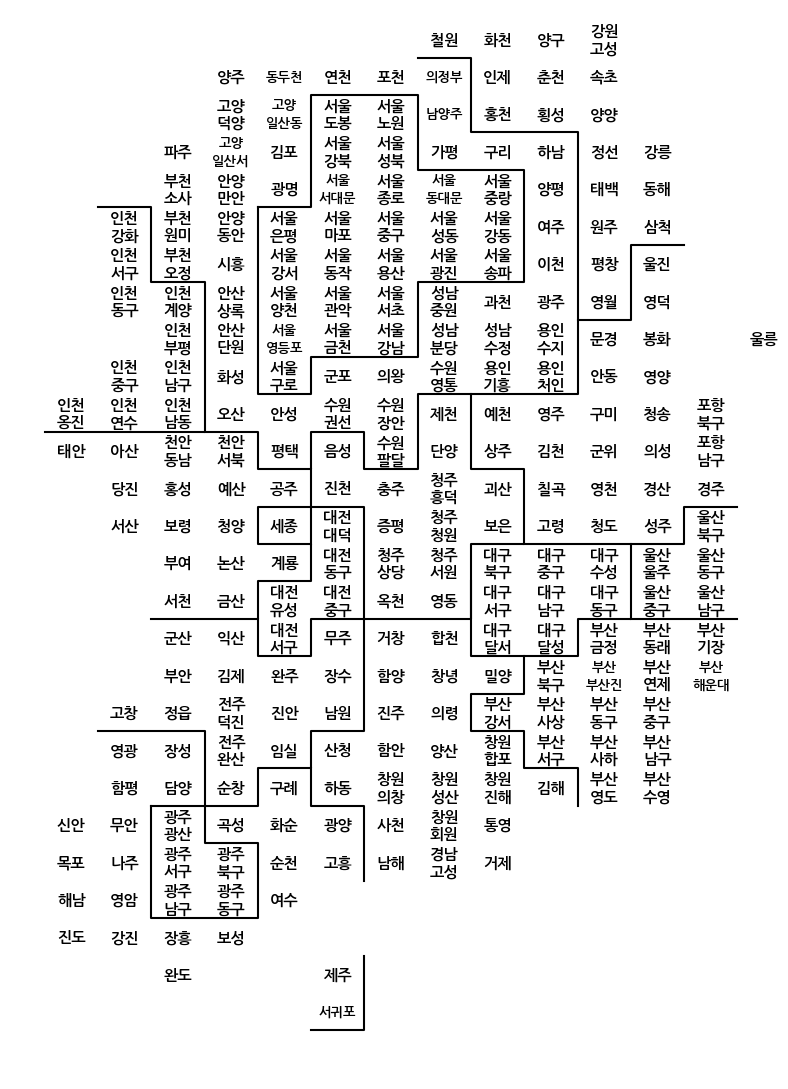

In [52]:
plt.figure(figsize = (8, 11))

# 지역 이름 표시
# itter : 반복자, enuminate
for idx, row in draw_korea.iterrows():

  # 광역시는 이름이 겹치는 경우가 많아서 시 단위 이름도 같이 표시!
  # (중구, 서구)
  if len(row['ID'].split()) == 2:
    dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
  elif row['ID'][:2] == '고성':
    dispname = '고성'
  else:
    dispname = row['ID']

  # '서대문구','서귀포시'와 같이 이름이 3자 이상인 경우에는 작은 글자로 표시
  # splitlines() : 행을 기준으로 문자열을 나눠주는 메서드
  if len(dispname.splitlines()[-1]) >= 3:
    fontsize, linespacing = 9.5, 1.5
  else:
    fontsize, linespacing = 11, 1.2

  # annotate(): 그래프에 화살표를 그린후, 그 화살표에 문자열을 출력하는 기능을 수행
  plt.annotate(dispname, (row['x']+ 0.5, row['y'] + 0.5), weight = 'bold',
               fontsize = fontsize, ha = 'center', va = 'center',
               linespacing = linespacing)
# 경계선을 이용한 시각화
for pos in BORDER_LINES:
  y, x = zip(*pos)
  plt.plot(x,y,c='black',lw=1.5)

# invert_yaxis() : y축을 반대로 변경하기 위해 사용하는 메서드
# 어떤 값에 의한 순위 변화를 시각화한다고 할 떄, y축 값이 작을수록 위로 위치하도록 만들고자 할 때 사용
plt.gca().invert_yaxis()
# plt.gca().set_aspect(1)
# axis 제거
plt.axis('off')

plt.tight_layout()
plt.show()

- 소멸위험지역을 분석한 데이터셋 pop와 지도를 시각화하기 위해 만든 draw_korea 데이터를 합칠 때, 공통의 컬럼인 ID 컬럼 확인

In [53]:
pop['ID'].unique()

array(['강릉', '강원 고성', '동해', '삼척', '속초', '양구', '양양', '영월', '원주', '인제',
       '정선', '철원', '춘천', '태백', '평창', '홍천', '화천', '횡성', '가평', '고양', '과천',
       '광명', '광주', '구리', '군포', '수원 권선', '용인 기흥', '김포', '남양주', '안산 단원',
       '고양 덕양', '동두천', '안양 동안', '안양 만안', '부천', '성남 분당', '안산 상록', '성남',
       '부천 소사', '수원', '성남 수정', '용인 수지', '시흥', '안산', '안성', '안양', '양주',
       '양평', '여주', '연천', '수원 영통', '오산', '부천 오정', '용인', '부천 원미', '의왕',
       '의정부', '이천', '고양 일산동', '고양 일산서', '수원 장안', '성남 중원', '용인 처인', '파주',
       '수원 팔달', '평택', '포천', '하남', '화성', '거제', '거창', '경남 고성', '김해', '남해',
       '창원 합포', '창원 회원', '밀양', '사천', '산청', '창원 성산', '양산', '의령', '창원 의창',
       '진주', '창원 진해', '창녕', '창원', '통영', '하동', '함안', '함양', '합천', '경산',
       '경주', '고령', '구미', '군위', '김천', '포항 남구', '문경', '봉화', '포항 북구', '상주',
       '성주', '안동', '영덕', '영양', '영주', '영천', '예천', '울릉', '울진', '의성', '청도',
       '청송', '칠곡', '포항', '광주 광산', '광주 남구', '광주 동구', '광주 북구', '광주 서구',
       '대구 남구', '대구 달서', '대구 달성', '대구 동구', '대구 북구', '대구 서구', '대구 수성',


In [54]:
draw_korea['ID'].unique()

array(['철원', '화천', '양구', '강원 고성', '양주', '동두천', '연천', '포천', '의정부', '인제',
       '춘천', '속초', '고양 덕양', '고양 일산동', '서울 도봉', '서울 노원', '남양주', '홍천', '횡성',
       '양양', '파주', '고양 일산서', '김포', '서울 강북', '서울 성북', '가평', '구리', '하남',
       '정선', '강릉', '부천 소사', '안양 만안', '광명', '서울 서대문', '서울 종로', '서울 동대문',
       '서울 중랑', '양평', '태백', '동해', '인천 강화', '부천 원미', '안양 동안', '서울 은평',
       '서울 마포', '서울 중구', '서울 성동', '서울 강동', '여주', '원주', '삼척', '인천 서구',
       '부천 오정', '시흥', '서울 강서', '서울 동작', '서울 용산', '서울 광진', '서울 송파', '이천',
       '평창', '울진', '인천 동구', '인천 계양', '안산 상록', '서울 양천', '서울 관악', '서울 서초',
       '성남 중원', '과천', '광주', '영월', '영덕', '인천 부평', '안산 단원', '서울 영등포',
       '서울 금천', '서울 강남', '성남 분당', '성남 수정', '용인 수지', '문경', '봉화', '울릉',
       '인천 중구', '인천 남구', '화성', '서울 구로', '군포', '의왕', '수원 영통', '용인 기흥',
       '용인 처인', '안동', '영양', '인천 옹진', '인천 연수', '인천 남동', '오산', '안성',
       '수원 권선', '수원 장안', '제천', '예천', '영주', '구미', '청송', '포항 북구', '태안',
       '아산', '천안 동남', '천안 서북', '평택', '음성', '수원 팔달', '단양', '상주', '김천',
       '군

In [55]:
# set() : 집합 중복을 허용하지 않는다.
set(draw_korea['ID'].unique()) - set(pop['ID'].unique())

{'청주 서원'}

In [56]:
set(pop['ID'].unique()) - set(draw_korea['ID'].unique())

{'고양', '부천', '서원', '성남', '수원', '안산', '안양', '용인', '전주', '창원', '천안', '청주', '포항'}

In [57]:
drop_data = list(set(pop['ID'].unique()) - set(draw_korea['ID'].unique()))

for data in drop_data:
  pop = pop.drop(pop[pop['ID'] == data].index)

print(set(pop['ID'].unique())- set(draw_korea['ID'].unique()))

set()


In [58]:
pop.head()

,광역시도,시도,20-39세여자,20-39세합계,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위험지역,ID
0,강원도,강릉시,23098.0,49384.0,37679.0,106231.0,107615.0,213846.0,1.226041,False,강릉
1,강원도,고성군,2529.0,7023.0,7151.0,15899.0,14215.0,30114.0,0.707314,True,강원 고성
2,강원도,동해시,9753.0,21264.0,15124.0,47166.0,46131.0,93297.0,1.289738,False,동해
3,강원도,삼척시,7115.0,15823.0,14610.0,35253.0,34346.0,69599.0,0.973990,True,삼척
4,강원도,속초시,8752.0,18708.0,12752.0,40288.0,41505.0,81793.0,1.372647,False,속초


- pop와 draw_korea 데이터셋의 공통 컬럼인 ID를 기준으로 병합

In [59]:
pop = pd.merge(pop, draw_korea, on =['ID'], how='left')
pop.head(10)

,광역시도,시도,20-39세여자,20-39세합계,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위험지역,ID,y,x
0,강원도,강릉시,23098.0,49384.0,37679.0,106231.0,107615.0,213846.0,1.226041,False,강릉,3,11
1,강원도,고성군,2529.0,7023.0,7151.0,15899.0,14215.0,30114.0,0.707314,True,강원 고성,0,10
2,강원도,동해시,9753.0,21264.0,15124.0,47166.0,46131.0,93297.0,1.289738,False,동해,4,11
3,강원도,삼척시,7115.0,15823.0,14610.0,35253.0,34346.0,69599.0,0.973990,True,삼척,5,11
4,강원도,속초시,8752.0,18708.0,12752.0,40288.0,41505.0,81793.0,1.372647,False,속초,1,10
5,강원도,양구군,2481.0,6849.0,4108.0,12918.0,11092.0,24010.0,1.207887,False,양구,0,9
6,강원도,양양군,2171.0,5087.0,6981.0,13838.0,13380.0,27218.0,0.621974,True,양양,2,10
7,강원도,영월군,3134.0,7159.0,9915.0,20652.0,19421.0,40073.0,0.632173,True,영월,7,10
8,강원도,원주시,43164.0,88919.0,42246.0,167854.0,170125.0,337979.0,2.043460,False,원주,5,10
9,강원도,인제군,3449.0,8961.0,5602.0,17677.0,15043.0,32720.0,1.231346,False,인제,1,8


In [60]:
# 인구수합계 컬럼을 기준으로 시각화
data = pop.pivot_table(index='y', columns='x', values='인구수합계')
# np.isnan() : nan의 포함여부를 확인하는 메서드
# np.ma.masked_where(조건식, data) : data를 조건에 참인것들만 배열처리하여 array 형태로 반환하는 메서드
data

x,0,1,2,3,4,5,6,7,8,9,10,11,12,13
y,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48013.0,26264.0,24010.0,30114.0,NaN,NaN,NaN
1,NaN,NaN,NaN,205513.0,98277.0,45907.0,154763.0,438457.0,32720.0,280707.0,81793.0,NaN,NaN,NaN
2,NaN,NaN,NaN,446233.0,292612.0,348220.0,567581.0,662154.0,70076.0,45991.0,27218.0,NaN,NaN,NaN
3,NaN,NaN,430781.000000,300839.0,363443.0,327195.0,450355.0,62448.0,193763.0,211101.0,38718.0,213846.0,NaN,NaN
4,NaN,NaN,283793.333333,252353.0,339484.0,314194.0,152737.0,355069.0,411005.0,111367.0,47070.0,93297.0,NaN,NaN
5,NaN,68010.0,283793.333333,345061.0,491476.0,379892.0,125249.0,299259.0,444168.0,111563.0,337979.0,69599.0,NaN,NaN
6,NaN,510733.0,283793.333333,402888.0,595485.0,400997.0,230241.0,357215.0,657831.0,210359.0,43318.0,51738.0,NaN,NaN
7,NaN,71014.0,330284.000000,375857.0,477739.0,506851.0,447192.0,237909.0,63778.0,327723.0,40073.0,39052.0,NaN,NaN
8,NaN,NaN,549716.000000,314002.0,370613.0,235386.0,567115.0,503830.0,232841.0,347833.0,74702.0,33539.0,NaN,10001.0


In [61]:
masked_data = np.ma.masked_where(np.isnan(data), data)
masked_data

masked_array(
  data=[[--, --, --, --, --, --, --, 48013.0, 26264.0, 24010.0, 30114.0,
         --, --, --],
        [--, --, --, 205513.0, 98277.0, 45907.0, 154763.0, 438457.0,
         32720.0, 280707.0, 81793.0, --, --, --],
        [--, --, --, 446233.0, 292612.0, 348220.0, 567581.0, 662154.0,
         70076.0, 45991.0, 27218.0, --, --, --],
        [--, --, 430781.0, 300839.0, 363443.0, 327195.0, 450355.0,
         62448.0, 193763.0, 211101.0, 38718.0, 213846.0, --, --],
        [--, --, 283793.3333333333, 252353.0, 339484.0, 314194.0,
         152737.0, 355069.0, 411005.0, 111367.0, 47070.0, 93297.0, --,
         --],
        [--, 68010.0, 283793.3333333333, 345061.0, 491476.0, 379892.0,
         125249.0, 299259.0, 444168.0, 111563.0, 337979.0, 69599.0, --,
         --],
        [--, 510733.0, 283793.3333333333, 402888.0, 595485.0, 400997.0,
         230241.0, 357215.0, 657831.0, 210359.0, 43318.0, 51738.0, --,
         --],
        [--, 71014.0, 330284.0, 375857.0, 477739.0, 50

In [62]:
def drawKorea(targetData, blockedMap, cmapname):
  # 컬럼, 데이터셋, 컬러맵색상지정
    gamma = 0.75

    whitelabelmin = (max(blockedMap[targetData]) -
                     min(blockedMap[targetData]))*0.25 + \
                     min(blockedMap[targetData])

    datalabel = targetData

    vmin = min(blockedMap[targetData])
    vmax = max(blockedMap[targetData])

    mapdata = blockedMap.pivot_table(index = 'y', columns = 'x', values = targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)

    plt.figure(figsize = (9, 11))
    plt.pcolor(masked_mapdata, vmin = vmin, vmax = vmax, cmap = cmapname,
               edgecolor = '#aaaaaa', linewidth = 0.5)

    # 지역 이름 표시
    for idx, row in blockedMap.iterrows():
        # 광역시는 구 이름이 겹치는 경우가 많아서 시 단위 이름도 같이 표시!
        # (중구, 서구)
        if len(row['ID'].split()) == 2:
            dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
        elif row['ID'][:2] == '고성':
            dispname = '고성'
        else:
            dispname = row['ID']

        # '서대문구', '서귀포시'와 같이 이름이 3자 이상인 경우에는 작은 글자로 표시
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 10.0, 1.1
        else:
            fontsize, linespacing = 11, 1.

        annocolor = 'white' if row[targetData] > whitelabelmin else 'black'
        # annotate(): 그래프에 화살표를 그린후, 그 화살표에 문자열을 출력하는 기능을 수행
        plt.annotate(dispname, (row['x'] + 0.5, row['y'] + 0.5), weight = 'bold',
                     fontsize = fontsize, ha = 'center', va = 'center', color = annocolor,
                     linespacing = linespacing)

    # '시도' 경계를 그려주기
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c = 'black', lw = 2)

    # ivert_yaxis()는 y축이 엑셀에서 0번이 시작하는 것과 matplotlib이 0이라고 인식하는 좌표가 서로 반대이기 때문에 사용!
    plt.gca().invert_yaxis()

    plt.axis('off')

    cb = plt.colorbar(shrink = 0.1, aspect = 10)
    cb.set_label(datalabel)

    plt.tight_layout()
    plt.show()

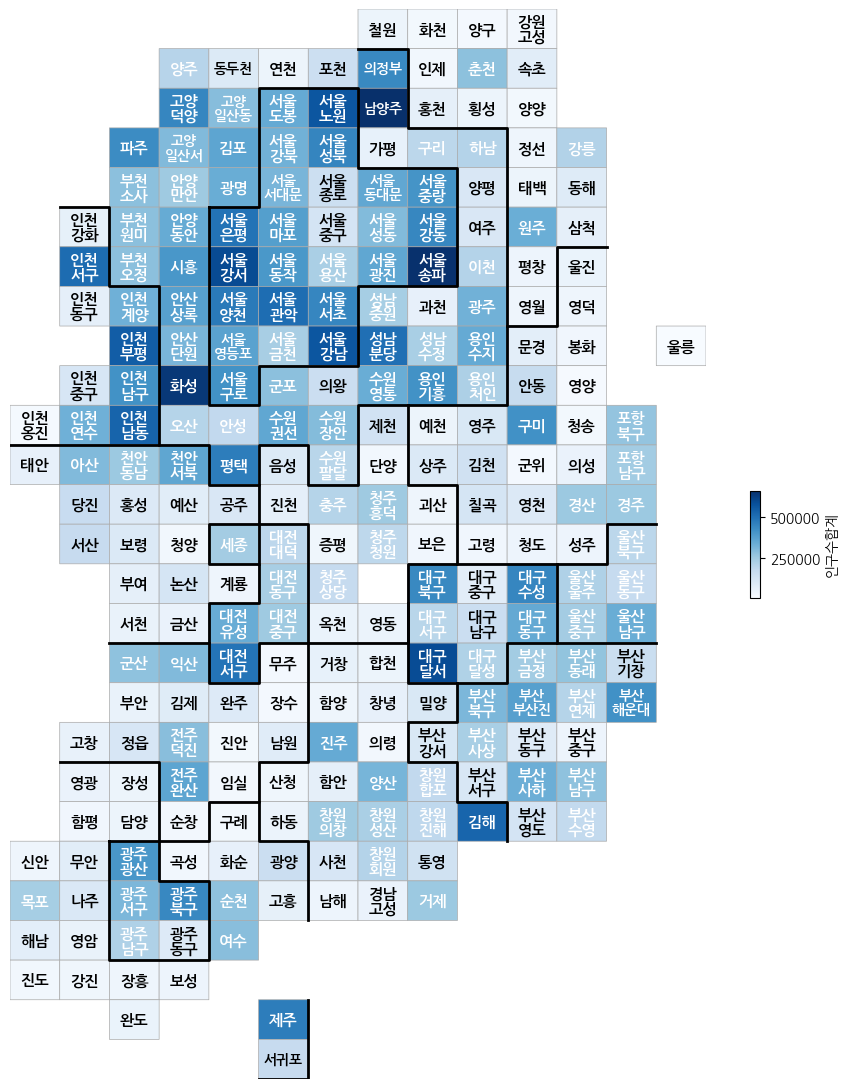

In [63]:
drawKorea('인구수합계', pop, 'Blues')

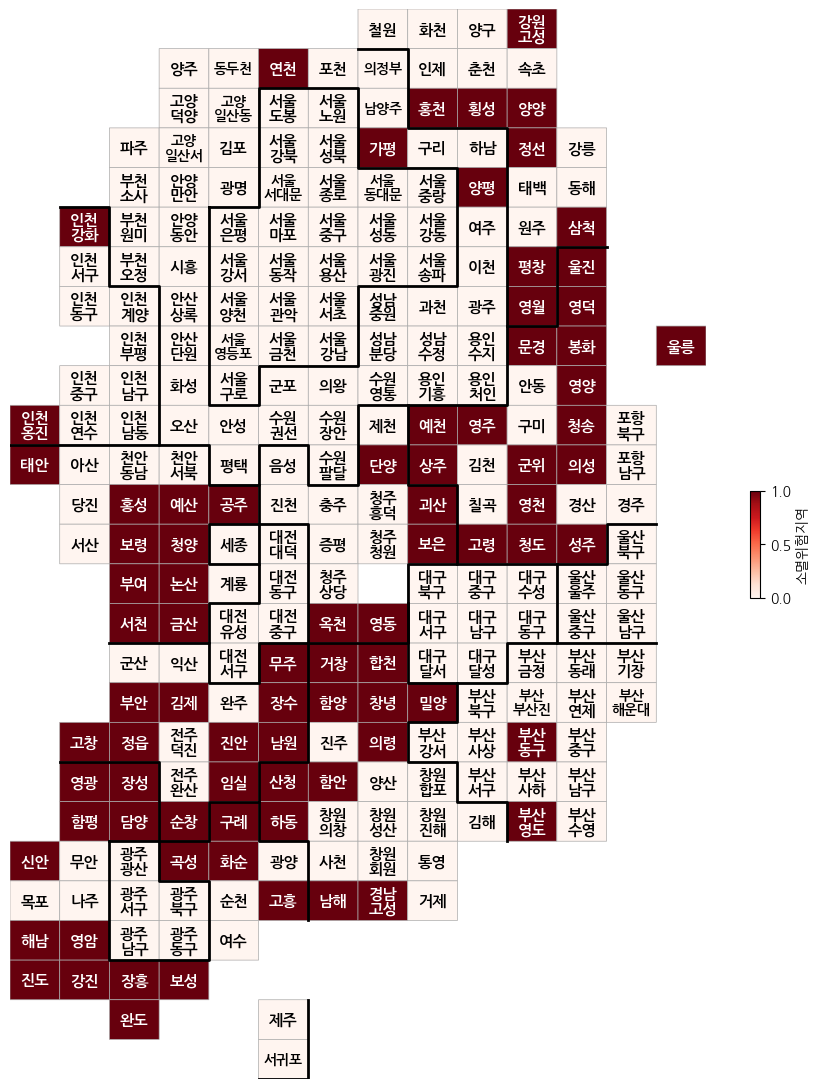

In [64]:
pop['소멸위험지역'] = [1 if i else 0 for i in pop['소멸위험지역']]
# for i in pop['소멸위험지역']:
# if i :
# return 1
# else:
# return 0
drawKorea('소멸위험지역',pop,'Reds')

# Folium을 이용한 시각화

In [65]:
pop.head()

,광역시도,시도,20-39세여자,20-39세합계,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위험지역,ID,y,x
0,강원도,강릉시,23098.0,49384.0,37679.0,106231.0,107615.0,213846.0,1.226041,0,강릉,3,11
1,강원도,고성군,2529.0,7023.0,7151.0,15899.0,14215.0,30114.0,0.707314,1,강원 고성,0,10
2,강원도,동해시,9753.0,21264.0,15124.0,47166.0,46131.0,93297.0,1.289738,0,동해,4,11
3,강원도,삼척시,7115.0,15823.0,14610.0,35253.0,34346.0,69599.0,0.973990,1,삼척,5,11
4,강원도,속초시,8752.0,18708.0,12752.0,40288.0,41505.0,81793.0,1.372647,0,속초,1,10


In [66]:
pop_folium = pop.set_index('ID')
pop_folium.head()

,광역시도,시도,20-39세여자,20-39세합계,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위험지역,y,x
ID,,,,,,,,,,,,
강릉,강원도,강릉시,23098.0,49384.0,37679.0,106231.0,107615.0,213846.0,1.226041,0,3,11
강원 고성,강원도,고성군,2529.0,7023.0,7151.0,15899.0,14215.0,30114.0,0.707314,1,0,10
동해,강원도,동해시,9753.0,21264.0,15124.0,47166.0,46131.0,93297.0,1.289738,0,4,11
삼척,강원도,삼척시,7115.0,15823.0,14610.0,35253.0,34346.0,69599.0,0.973990,1,5,11
속초,강원도,속초시,8752.0,18708.0,12752.0,40288.0,41505.0,81793.0,1.372647,0,1,10


In [67]:
import folium
import json
import warnings
# warnings.simplefilter(action='ignore', category = FutureWarning)
warnings.filterwarnings('ignore')

In [68]:
geo_str = json.load(open("skorea_municipalities_geo_simple (1).json",encoding='utf-8'))

In [69]:
m = folium.Map(location=[36.2002, 127.054], zoom_start=7)
m.choropleth(geo_data=geo_str,
             data=pop_folium['인구수합계'],
             columns=[pop_folium.index,pop_folium['인구수합계']],
             fill_color='YlGnBu',
             key_on='feature.id')
m

In [70]:
m = folium.Map(location=[36.2002, 127.054], zoom_start=7)
m.choropleth(geo_data=geo_str,
             data=pop_folium['소멸위험지역'],
             columns=[pop_folium.index,pop_folium['소멸위험지역']],
             fill_color='YlGnBu',
             key_on='feature.id')
m

In [71]:
pop.to_csv('pop_korea.csv', encoding='utf-8', sep=',')